In [1]:
!pip install tensorflow==2.15.0 opencv-python matplotlib


  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attemp

In [2]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl (377.0 MB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 656.4 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 656.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.1 MB 595.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.1 MB 516.7 kB/s eta 0:00:02
   ----- ---------------------------------- 0.1/1.1 MB 532.5 kB/s eta 0:00:02
   ------ -------------------

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [5]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')


In [4]:
!tar -xf lfw.tgz

In [108]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [109]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        print(os.path.join('lfw', directory, file))
        print(os.path.join(NEG_PATH, file))
        

In [110]:
import uuid

In [111]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))


'data\\anchor\\53a68114-1c55-11ef-8a99-d1493b91e36f.jpg'

In [112]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    frame = frame[190:440,190:440, :]
    
    if cv2.waitKey(1) & 0xFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        
    if cv2.waitKey(1) & 0xFF == ord('p'):   
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    
    cv2.imshow('Image Collection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

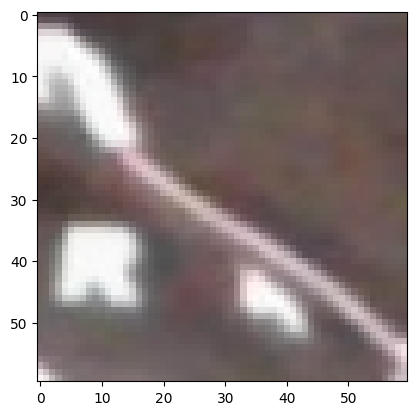

In [113]:
plt.imshow(frame[190:440,190:440, :])

In [114]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(80)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(80)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(80)

In [115]:
dir_test = anchor.as_numpy_iterator()

In [116]:
dir_test.next()

b'data\\anchor\\vimg10.jpg'

In [117]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [118]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img / 255.0
    return img

In [119]:
preprocess('data\\anchor\\17768c67-de15-11ee-932f-744ca17a9e34 - Copy (2).jpg')

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.7889706 , 0.785049  , 0.7654412 ],
        [0.79044116, 0.7801471 , 0.76053923],
        [0.7914216 , 0.7796569 , 0.76004905],
        ...,
        [0.7227941 , 0.7267157 , 0.70710784],
        [0.70465684, 0.7085784 , 0.68897057],
        [0.6970588 , 0.70098037, 0.6813725 ]],

       [[0.7980392 , 0.7754902 , 0.7617647 ],
        [0.80220586, 0.7796569 , 0.76593137],
        [0.80539215, 0.7828431 , 0.76911765],
        ...,
        [0.7259804 , 0.7289216 , 0.7122549 ],
        [0.72156864, 0.7245098 , 0.7078431 ],
        [0.72156864, 0.7254902 , 0.7058824 ]],

       [[0.8132353 , 0.78186274, 0.7710784 ],
        [0.8125    , 0.78112745, 0.7703431 ],
        [0.8125    , 0.78112745, 0.7703431 ],
        ...,
        [0.7377451 , 0.7377451 , 0.72990197],
        [0.74264705, 0.74264705, 0.7348039 ],
        [0.7382353 , 0.7392157 , 0.72843134]],

       ...,

       [[0.71838236, 0.7242647 , 0.7134804 ],
        [0.71

In [120]:
img = preprocess('data\\anchor\\997b1446-de13-11ee-ad70-744ca17a9e34 - Copy.jpg')

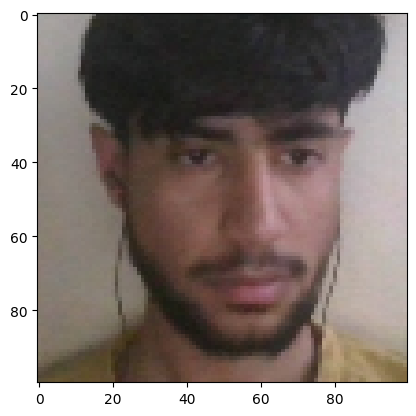

In [121]:
plt.imshow(img)

In [122]:
positives = tf.data.Dataset.zip(anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))
negatives = tf.data.Dataset.zip(anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))))
data = positives.concatenate(negatives)

In [123]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [124]:
tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [125]:
samples = data.as_numpy_iterator()

In [126]:
example = samples.next()

In [127]:
example

(b'data\\anchor\\4466ac8b-de14-11ee-aeb7-744ca17a9e34.jpg',
 b'data\\positive\\21825bb0-de15-11ee-afef-744ca17a9e34 - Copy (3).jpg',
 1.0)

In [128]:
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

In [129]:
res = preprocess_twin(*example)

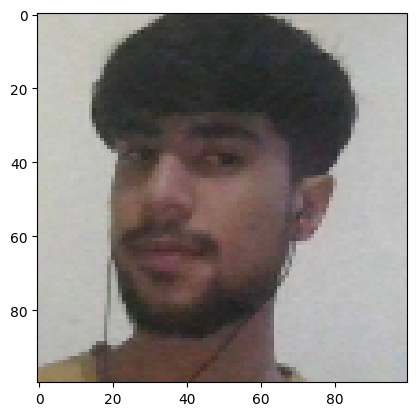

In [130]:
plt.imshow(res[1])

In [131]:
res[2]

1.0

In [132]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [133]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [134]:
samples = data.as_numpy_iterator()

In [135]:
samp = samples.next()

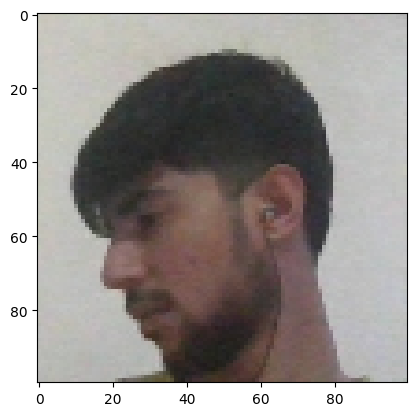

In [136]:
plt.imshow(samp[0])

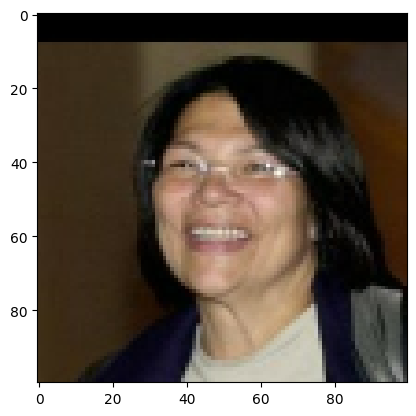

In [137]:
plt.imshow(samp[1])

In [138]:
samp[2]

0.0

In [139]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [140]:
round(len(data)*.7)

112

In [141]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [142]:
train_samples = train_data.as_numpy_iterator()

In [143]:
train_sample = train_samples.next() 

In [144]:
len(train_sample[0])

16

In [145]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [146]:
inp = Input(shape=(100,100,3), name='input_image')

In [147]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [148]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [149]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [150]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [151]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [152]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [153]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [155]:
embedding = make_embedding()

In [156]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [158]:
l1 = L1Dist()

In [159]:
l1

<L1Dist name=l1_dist_4, built=False>

In [160]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [161]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [162]:
siamese_layer = L1Dist()

In [163]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        # Access the tensors within the lists
        input_tensor = input_embedding[0]
        validation_tensor = validation_embedding[0]
        # Calculate the absolute difference between tensors
        return tf.math.abs(input_tensor - validation_tensor)


In [164]:
l1 = L1Dist()
distances = l1(inp_embedding, val_embedding)


In [165]:
classifier = Dense(1, activation='sigmoid')(distances)

In [166]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_47>

In [167]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [168]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_6 (L1Dist)            │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_6[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [170]:
siamese_model = make_siamese_model()

In [171]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_7 (L1Dist)            │ (None, 4096)              │               0 │ embedding[2][0],           │
│                               │                           │                 │ embedding[3][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_7[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [173]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [174]:
checkpoint_dir = './training_checkpoints'

In [175]:
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

In [176]:
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [177]:
test_batch = train_data.as_numpy_iterator()

In [178]:
batch_1 = test_batch.next()

In [179]:
batch_1

(array([[[[0.6311275 , 0.63504905, 0.6507353 ],
          [0.6335784 , 0.6375    , 0.65318626],
          [0.6426471 , 0.64656866, 0.6622549 ],
          ...,
          [0.7377451 , 0.702451  , 0.71617645],
          [0.74264705, 0.7007353 , 0.73063725],
          [0.75490195, 0.7078431 , 0.7470588 ]],
 
         [[0.6093137 , 0.6122549 , 0.61813724],
          [0.6095588 , 0.6112745 , 0.61740196],
          [0.6122549 , 0.6102941 , 0.61715686],
          ...,
          [0.72132355, 0.69558823, 0.70612746],
          [0.73333335, 0.69803923, 0.7254902 ],
          [0.7352941 , 0.6901961 , 0.72745097]],
 
         [[0.49068627, 0.485049  , 0.48014706],
          [0.4987745 , 0.485049  , 0.48308823],
          [0.51862746, 0.50490195, 0.5029412 ],
          ...,
          [0.72818625, 0.70980394, 0.717402  ],
          [0.73137254, 0.71004903, 0.72794116],
          [0.7389706 , 0.717402  , 0.7360294 ]],
 
         ...,
 
         [[0.49215686, 0.45392156, 0.39019608],
          [0.48259

In [180]:
X = batch_1[:2]

In [181]:
y = batch_1[2]

In [182]:
y

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [183]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](https://en.wikipedi

In [184]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [185]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [186]:
EPOCHS = 50

In [187]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

 Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

 Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

 Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

 Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

 Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

 Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step

 Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

 Epoch 18/5

In [189]:
from tensorflow.keras.metrics import Precision, Recall

In [190]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [191]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


array([[9.9783415e-01],
       [1.0000000e+00],
       [2.0431414e-04],
       [1.0000000e+00],
       [9.9988937e-01],
       [4.2980204e-08],
       [5.4753599e-08],
       [2.9965552e-08],
       [2.5915751e-06],
       [9.9999964e-01],
       [3.0599612e-08],
       [1.8339237e-07],
       [9.9999988e-01],
       [3.8636190e-06],
       [9.9998051e-01],
       [4.6248129e-05]], dtype=float32)

In [192]:
 [1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [193]:
y_true

array([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [194]:
m = Precision()
 
m.update_state(y_true, y_hat)

m.result().numpy()

1.0

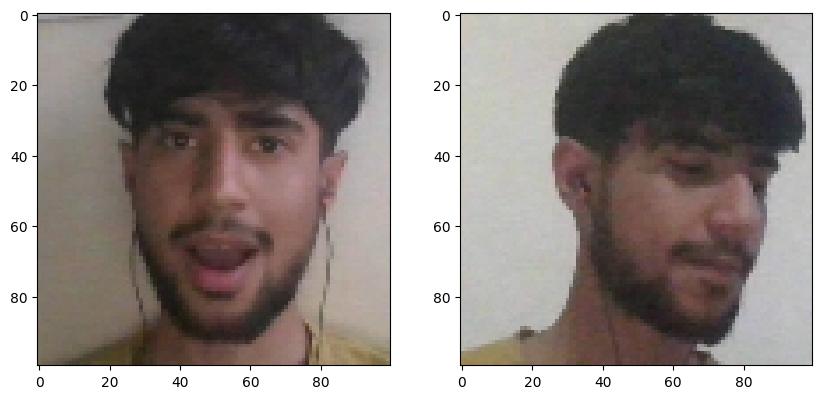

In [195]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[1])

# Renders cleanly
plt.show()

In [196]:
siamese_model.save('siamesemodelv2.keras')

In [197]:
L1Dist

__main__.L1Dist

In [198]:
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


array([[9.9783415e-01],
       [1.0000000e+00],
       [2.0431414e-04],
       [1.0000000e+00],
       [9.9988937e-01],
       [4.2980204e-08],
       [5.4753599e-08],
       [2.9965552e-08],
       [2.5915751e-06],
       [9.9999964e-01],
       [3.0599612e-08],
       [1.8339237e-07],
       [9.9999988e-01],
       [3.8636190e-06],
       [9.9998051e-01],
       [4.6248129e-05]], dtype=float32)

In [199]:
siamese_model.summary() 

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_7 (L1Dist)            │ (None, 4096)              │               0 │ embedding[2][0],           │
│                               │                           │                 │ embedding[3][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_7[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [200]:
os.listdir(os.path.join('application_data', 'verification_images'))

['1d33a34e-de15-11ee-b864-744ca17a9e34 - Copy (2).jpg',
 '1e968e47-de15-11ee-b3e9-744ca17a9e34 - Copy (2).jpg',
 '20ed5503-de15-11ee-99b7-744ca17a9e34 - Copy (2).jpg',
 '21825bb0-de15-11ee-afef-744ca17a9e34 - Copy (2).jpg',
 '233a0896-de15-11ee-90e8-744ca17a9e34 - Copy (2).jpg',
 '26394943-de15-11ee-a65c-744ca17a9e34 - Copy (3).jpg',
 '29cfdf8f-de15-11ee-90be-744ca17a9e34 - Copy.jpg',
 '2b439c80-de15-11ee-b789-744ca17a9e34 - Copy (3).jpg',
 '2d0284ac-de15-11ee-9f21-744ca17a9e34 - Copy (3).jpg',
 '2d990696-de15-11ee-bea2-744ca17a9e34.jpg',
 '351f0a19-de14-11ee-9dbb-744ca17a9e34 - Copy.jpg',
 '3669adab-de14-11ee-911e-744ca17a9e34 - Copy (2).jpg',
 '36f51b46-de14-11ee-a041-744ca17a9e34.jpg',
 '3a8df98b-de14-11ee-8291-744ca17a9e34 - Copy (3).jpg',
 '3ff5a553-de14-11ee-8af7-744ca17a9e34 - Copy (2).jpg',
 '4466ac8b-de14-11ee-aeb7-744ca17a9e34.jpg',
 '456c363b-de14-11ee-94e7-744ca17a9e34.jpg',
 '4aadc52a-de14-11ee-8926-744ca17a9e34 - Copy (2).jpg',
 '4b47be89-de14-11ee-90a5-744ca17a9e34 - Cop

In [201]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [202]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\1d33a34e-de15-11ee-b864-744ca17a9e34 - Copy (2).jpg
application_data\verification_images\1e968e47-de15-11ee-b3e9-744ca17a9e34 - Copy (2).jpg
application_data\verification_images\20ed5503-de15-11ee-99b7-744ca17a9e34 - Copy (2).jpg
application_data\verification_images\21825bb0-de15-11ee-afef-744ca17a9e34 - Copy (2).jpg
application_data\verification_images\233a0896-de15-11ee-90e8-744ca17a9e34 - Copy (2).jpg
application_data\verification_images\26394943-de15-11ee-a65c-744ca17a9e34 - Copy (3).jpg
application_data\verification_images\29cfdf8f-de15-11ee-90be-744ca17a9e34 - Copy.jpg
application_data\verification_images\2b439c80-de15-11ee-b789-744ca17a9e34 - Copy (3).jpg
application_data\verification_images\2d0284ac-de15-11ee-9f21-744ca17a9e34 - Copy (3).jpg
application_data\verification_images\2d990696-de15-11ee-bea2-744ca17a9e34.jpg
application_data\verification_images\351f0a19-de14-11ee-9dbb-744ca17a9e34 - Copy.jpg
application_data\verification_images\366

In [203]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [204]:
43/50

0.86

In [205]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

In [207]:
np.sum(np.squeeze(results) > 0.9)

31

In [208]:
results

[array([[0.999998]], dtype=float32),
 array([[0.99999577]], dtype=float32),
 array([[0.9999985]], dtype=float32),
 array([[0.9879231]], dtype=float32),
 array([[0.99999076]], dtype=float32),
 array([[0.9996546]], dtype=float32),
 array([[0.9999987]], dtype=float32),
 array([[0.9999994]], dtype=float32),
 array([[0.99981683]], dtype=float32),
 array([[0.99999356]], dtype=float32),
 array([[0.2757486]], dtype=float32),
 array([[0.8488907]], dtype=float32),
 array([[0.01354634]], dtype=float32),
 array([[0.00741749]], dtype=float32),
 array([[0.13452192]], dtype=float32),
 array([[0.00768061]], dtype=float32),
 array([[0.00820644]], dtype=float32),
 array([[0.22077774]], dtype=float32),
 array([[0.1477929]], dtype=float32),
 array([[0.15256]], dtype=float32),
 array([[0.8491401]], dtype=float32),
 array([[0.93304765]], dtype=float32),
 array([[0.00922361]], dtype=float32),
 array([[0.9645004]], dtype=float32),
 array([[0.9493635]], dtype=float32),
 array([[0.43901214]], dtype=float32),
 a